<Figure size 1200x600 with 0 Axes>

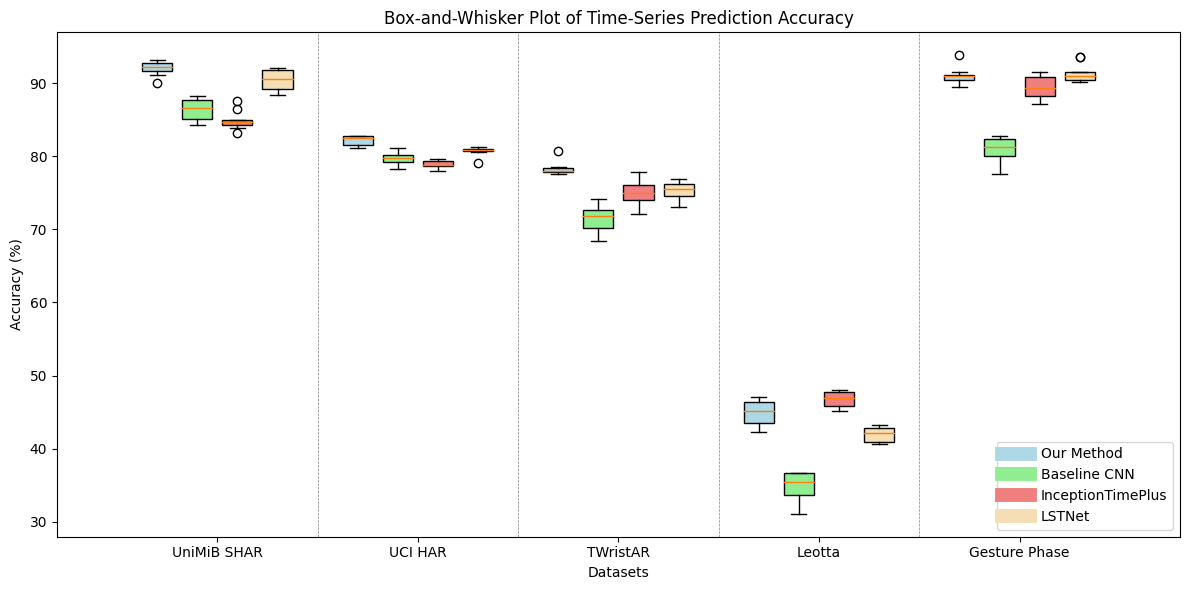

In [2]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["UniMiB SHAR", "UCI HAR", "TWristAR", "Leotta", "Gesture Phase"]
# Hypothetical data for box-and-whisker plot
# For each method, we'll assume 10 runs on each dataset, represented by the list of accuracies
# These are hypothetical numbers for demonstration purposes

our_method_data = [
    [90, 91.1, 91.5, 92.2, 92.1, 92.3, 92.5, 92.8, 92.9, 93.1],  # UniMiB SHAR
    [81.1, 81.2, 82.4, 82.8, 82.8, 82.7],  # UCI HAR
    [80.7, 78.4, 77.9, 77.5, 77.9, 78.5, 78],  # TWristAR
    [42.3, 43.4, 44, 45.2, 45.2, 43.4, 46, 46.5, 46.8, 47.1],  # Leotta
    [93.8, 89.4, 91.5, 91.1, 90.5, 90.3, 91.1, 90.3, 91, 91.]  # Gesture Phase
]

baseline_cnn_data = [
    [84.3, 84.6, 85.0, 85.5, 86.2, 87.0, 87.5, 87.8, 88.0, 88.2],
    [78.2, 79.0, 79.6, 79.8, 80.3, 81.1],
    [68.4, 69.4, 71.0, 71.8, 72.0, 73.4, 74.2],
    [31.1, 33.5, 33.1, 34, 35, 36, 36.5, 36.7, 36.7, 36.7],
    [77.6, 80.1, 79.0, 80.0, 80.9, 81.5, 82.0, 82.5, 82.7, 82.8]
]

InceptionTimePlus_data = [
    [84.7, 83.8, 84.3, 84.4, 83.2, 86.4, 84.9, 84.9, 87.6],
    [79.5, 79.6, 79.4, 78.8, 79.4, 78.6, 78.6, 78.1, 78],
    [76.0, 74, 74, 75, 72.1, 77.4, 76, 77.9, 75],
    [47.1, 45.5, 45.4, 48.0, 47.5, 46.9, 45.2, 48.0, 46.7, 47.8],
    [87.2, 89.3, 88.4, 87.5, 88.2, 89.4, 90.4, 91.0, 91.3, 91.5]
]

lstnet_data = [
    [88.3, 88.6, 89.0, 89.5, 90.2, 91.0, 91.5, 91.8, 91.9, 92.0],
    [79, 81.3, 80.6, 80.8, 80.9, 81],
    [76, 76.9, 73.1, 75],
    [42.2, 43.3, 42.8, 42.9, 40.7, 40.9, 42.5, 41.3, 40.6],
    [91.5, 93.6, 91.5, 93.6, 90.5, 90.1, 90.2, 90.3, 90.6, 91.2]
]


# Creating the box-and-whisker plot
plt.figure(figsize=(12, 6))

# Function to prepare data for side-by-side plotting
def prepare_data_for_side_by_side_plotting(*args):
    # This function will arrange data for side-by-side plotting
    grouped_data = []
    for i in range(len(args[0])):  # Iterate over each dataset
        for data in args:  # Iterate over each method
            grouped_data.append(data[i])
    return grouped_data

# Prepare data for side-by-side plotting
plot_data = prepare_data_for_side_by_side_plotting(our_method_data, baseline_cnn_data, InceptionTimePlus_data, lstnet_data)

# Number of datasets and methods
n_datasets = len(datasets)
n_methods = 4  # Our Method, Baseline CNN, Baseline LSTM, LSTNet

# Creating the box-and-whisker plot for side-by-side comparison
plt.figure(figsize=(12, 6))

# Plotting
base_positions = np.arange(1, n_datasets + 1)  # Base positions for each dataset
offset = np.linspace(-0.3, 0.3, n_methods)     # Fixed offsets for each method
colors = ['lightblue', 'lightgreen', 'lightcoral', 'wheat']  # Colors for each method

# Plot each method's data and create custom legend patches
legend_patches = []
for i, method_data in enumerate([our_method_data, baseline_cnn_data, InceptionTimePlus_data, lstnet_data]):
    pos = base_positions + offset[i]
    boxplot = plt.boxplot(method_data, positions=pos, widths=0.15, patch_artist=True, boxprops=dict(facecolor=colors[i]))
    legend_patches.append(plt.Line2D([0], [0], color=colors[i], linewidth=10, label=['Our Method', 'Baseline CNN', 'InceptionTimePlus', 'LSTNet'][i]))

# Adding vertical lines to separate datasets
for x in np.arange(1.5, n_datasets + 0.5, 1):
    plt.axvline(x=x, color='grey', linestyle='--', linewidth=0.5)

# Adding labels and title
plt.xlabel('Datasets')
plt.ylabel('Accuracy (%)')
plt.title('Box-and-Whisker Plot of Time-Series Prediction Accuracy')
plt.xticks(base_positions, datasets)
plt.legend(handles=legend_patches, loc='lower right')

# Save the plot as a high-resolution PNG file
plt.savefig('/content/Box-plot.pdf', dpi=300)


# Displaying the plot
plt.tight_layout()
plt.show()
